In [1]:
import networkx as nx
import math
import matplotlib.pyplot as plt
from networkx.algorithms import tree
import pandas

In [2]:
def construct_edges(edges):
    G = nx.Graph()
    for e in edges:
        G.add_edge(e[0], e[1], weight=e[2])

    return G

In [3]:
def plot_graph(G, edges):
    pos = nx.spring_layout(G,k=4/math.sqrt(G.order()), iterations=30)
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)
    #elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
    #esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=3)
    # nx.draw_networkx_edges(G, pos, edgelist=esmall,
    #                        width=6, alpha=0.5, edge_color='b', style='dashed')
    # labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    # edge label
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.axis('off')
    plt.show()

In [10]:
# Use matplotlib and networkx to visualize the graph provided
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
%matplotlib inline

def draw_graph(graph, canvas_size=(8, 12), node_size=1500,
                   layout_fn=graphviz_layout, **kwargs):
        # Set Canvas Size
        f = plt.figure(10, figsize=canvas_size)

        # Remove axes and set a margin to prevent cut-off
        ax = plt.gca()
        [sp.set_visible(False) for sp in ax.spines.values()]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.margins(0.30)

        root = kwargs.pop('root', None)
        if root is not None:
            pos = layout_fn(graph, root=root, prog='dot')

        else:
            pos = layout_fn(graph, root=0)
            
        
        try:
            edge_labels = {(i[0],i[1]): i[2]['operation'] for i in graph.edges(data=True)}
        except Exception:
            edge_labels = None

        nx.draw_networkx(graph, pos=pos,
                         with_labels=True,
                         node_size=node_size, label_pos=3)
        nx.draw_networkx_edge_labels(graph,
                                     pos=pos,
                                     edge_labels=edge_labels)
        plt.show()
        #return f

In [6]:
def find_mst(file_name):
    df = pandas.read_csv(file_name, index_col='name')
    nodes = list(df.columns.values)
    edges = []
    for u in nodes:
        for v in nodes:
            edges.append((u,v,1-df[u][v]))
    G = construct_edges(edges)
    mst = tree.minimum_spanning_edges(G, algorithm='kruskal', data=True)
    edgelist = list(mst)
    return sorted(edgelist)

('0.csv', '1.csv', {'weight': 0.9742})
('0.csv', '3.csv', {'weight': 1})
('0.csv', '4.csv', {'weight': 1})
('0.csv', '8.csv', {'weight': 1})
('0.csv', '9.csv', {'weight': 1})


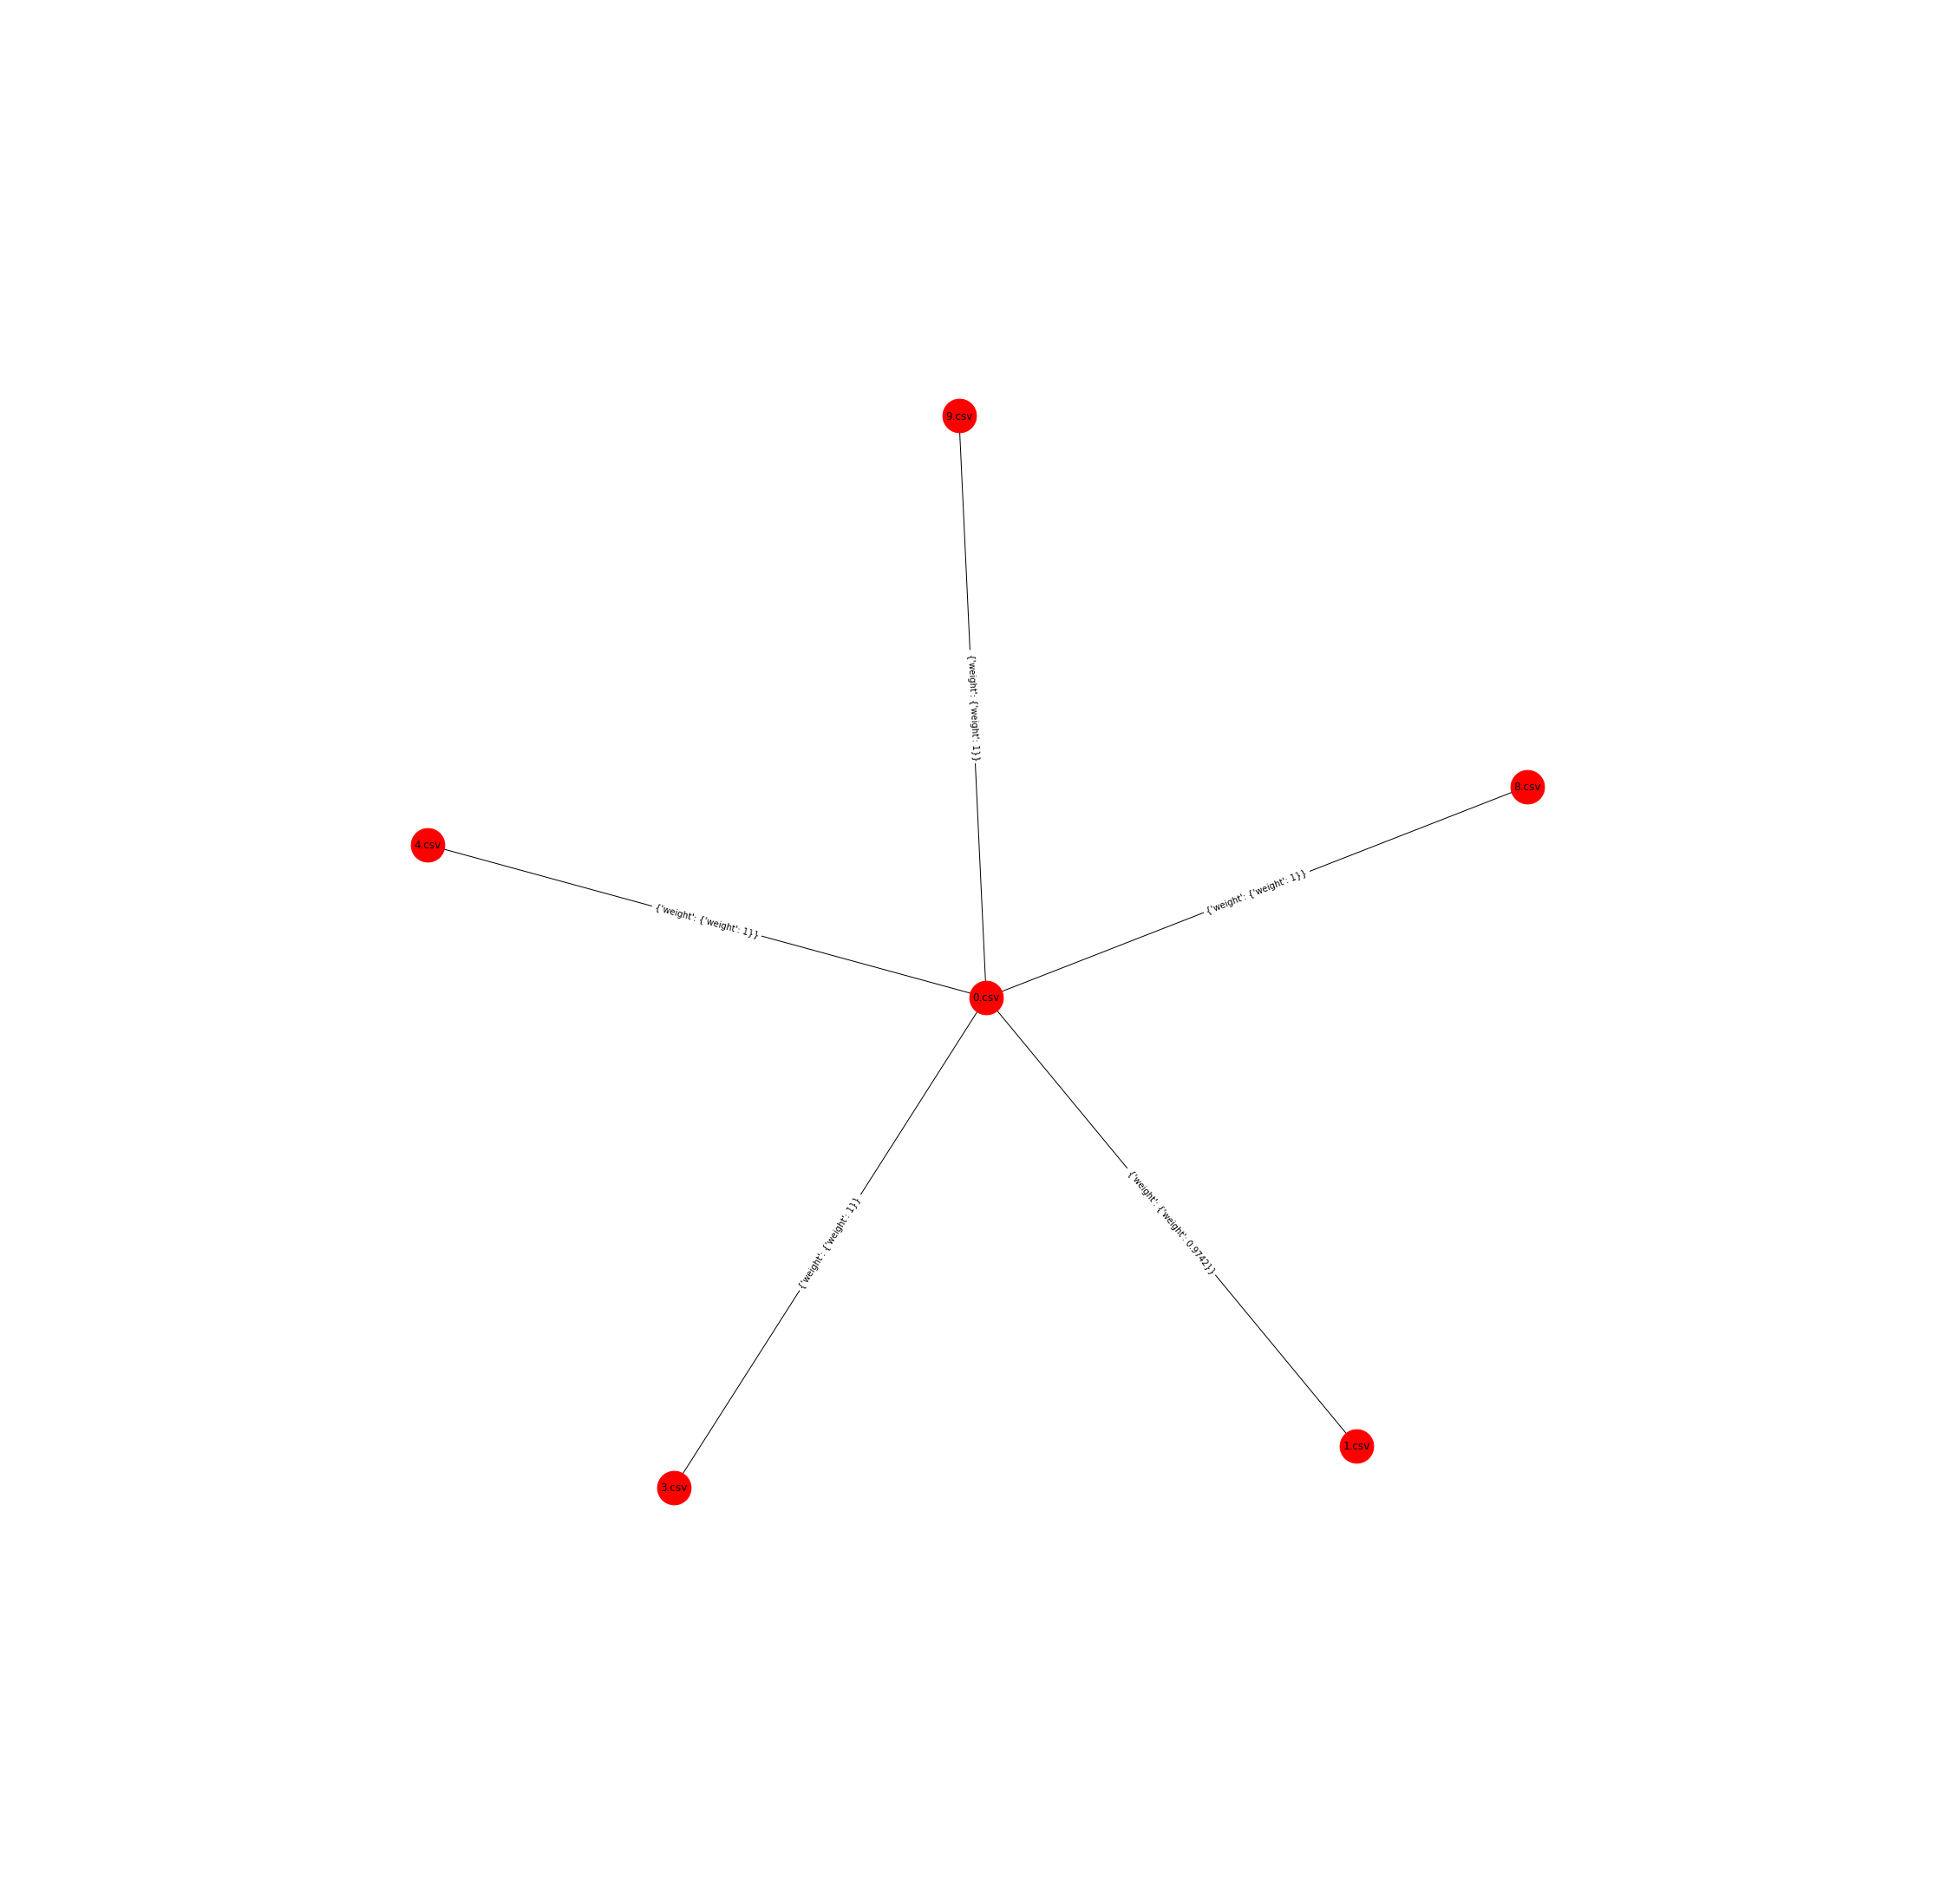

In [23]:
file_name_col = '/home/slhuang/Public/2019_spring/lineage_inference/code/RELIC/RELIC_Silu/src/preserving_ops/result/cell_sim_5.csv'
#'/home/slhuang/Public/2018-fall/lineage_inference/case_study/result/col_sim.txt'
selected_edges = find_mst(file_name_col)
print (*selected_edges, sep='\n')
# mst_edges = []
# for e in selected_edges:
#     mst_edges.append((e[0], e[1], e[2]['weight']))
MST = construct_edges(selected_edges)
#plot_graph(MST)
draw_graph(MST, canvas_size=(40,40))

('0.csv', '1.csv', {'weight': 0.16492700000000005})
('0.csv', '3.csv', {'weight': 0.138718})
('3.csv', '4.csv', {'weight': 0.07271200000000011})
('4.csv', '8.csv', {'weight': 0.05855200000000005})
('8.csv', '9.csv', {'weight': 0.0})


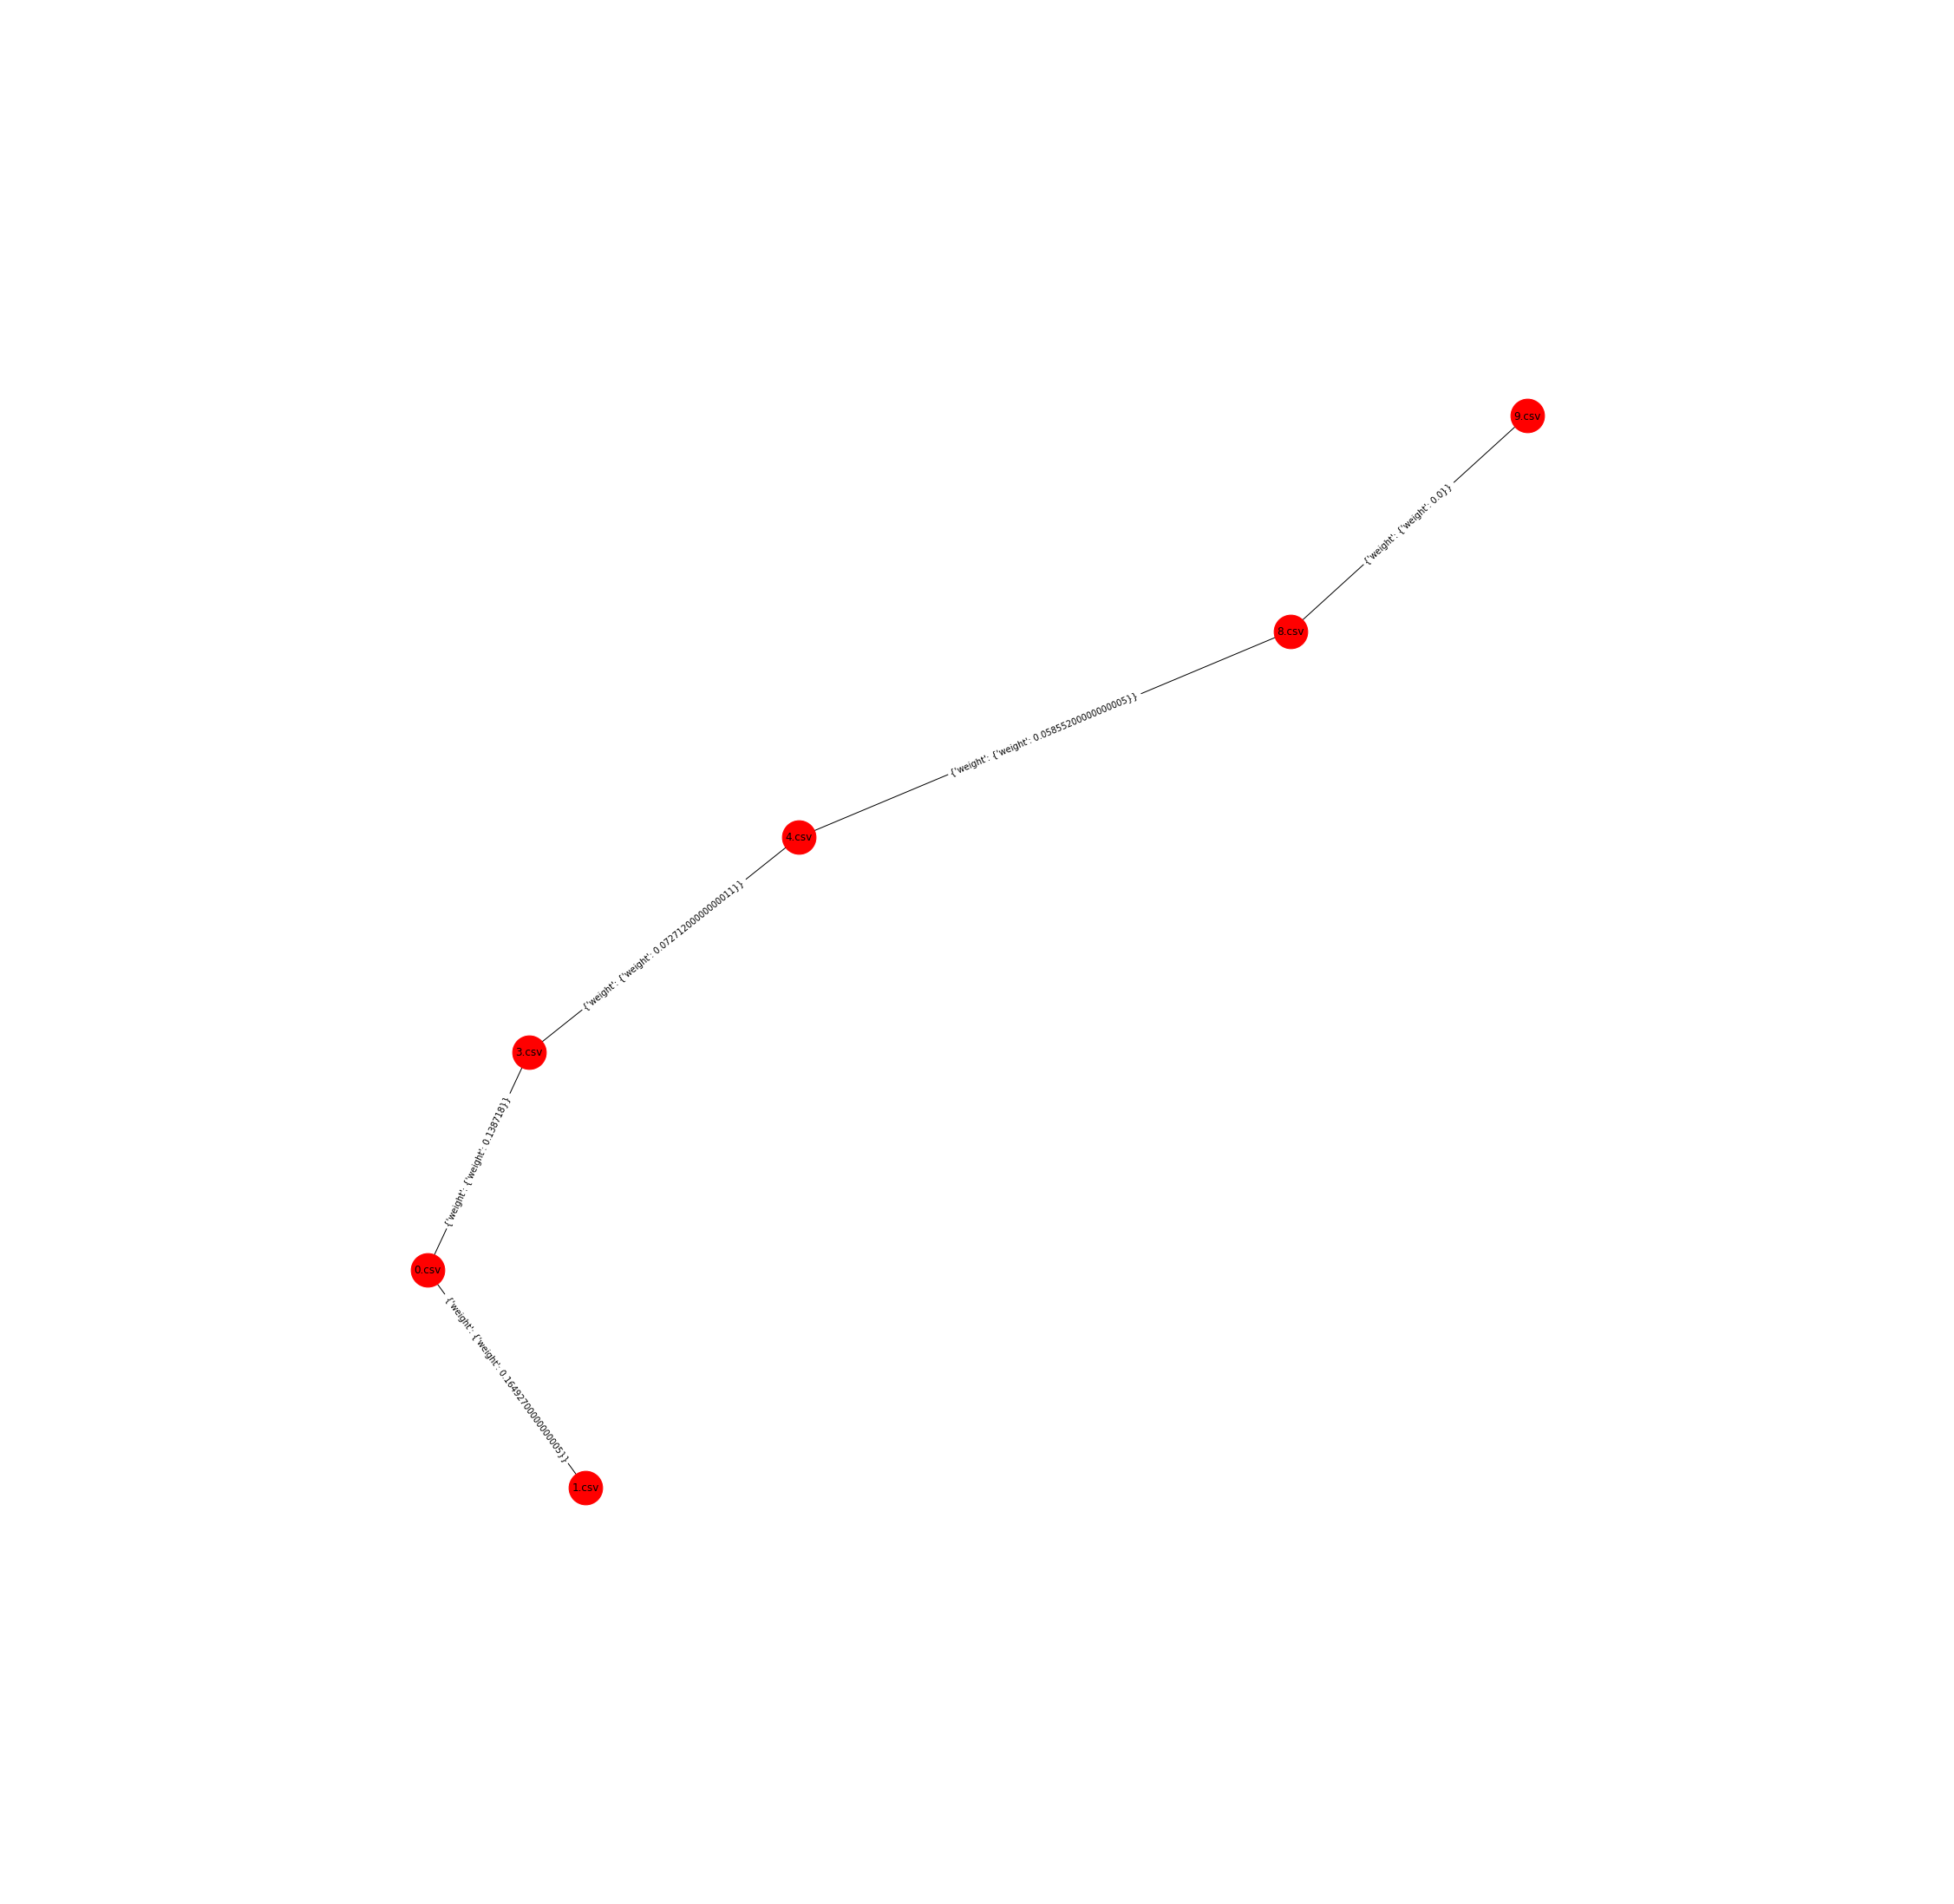

In [20]:
file_name_col = '/home/slhuang/Public/2019_spring/lineage_inference/code/src/preserving_ops/result/col_sim_5.csv'
#'/home/slhuang/Public/2018-fall/lineage_inference/case_study/result/col_sim.txt'
selected_edges = find_mst(file_name_col)
print (*selected_edges, sep='\n')
# mst_edges = []
# for e in selected_edges:
#     mst_edges.append((e[0], e[1], e[2]['weight']))
MST = construct_edges(selected_edges)
#plot_graph(MST)
draw_graph(MST, canvas_size=(40,40))

('0.csv', '1.csv', {'weight': 0.9742})
('0.csv', '3.csv', {'weight': 0.7659})
('3.csv', '4.csv', {'weight': 0.399829})
('4.csv', '8.csv', {'weight': 0.3274020000000001})
('8.csv', '9.csv', {'weight': 0.0})


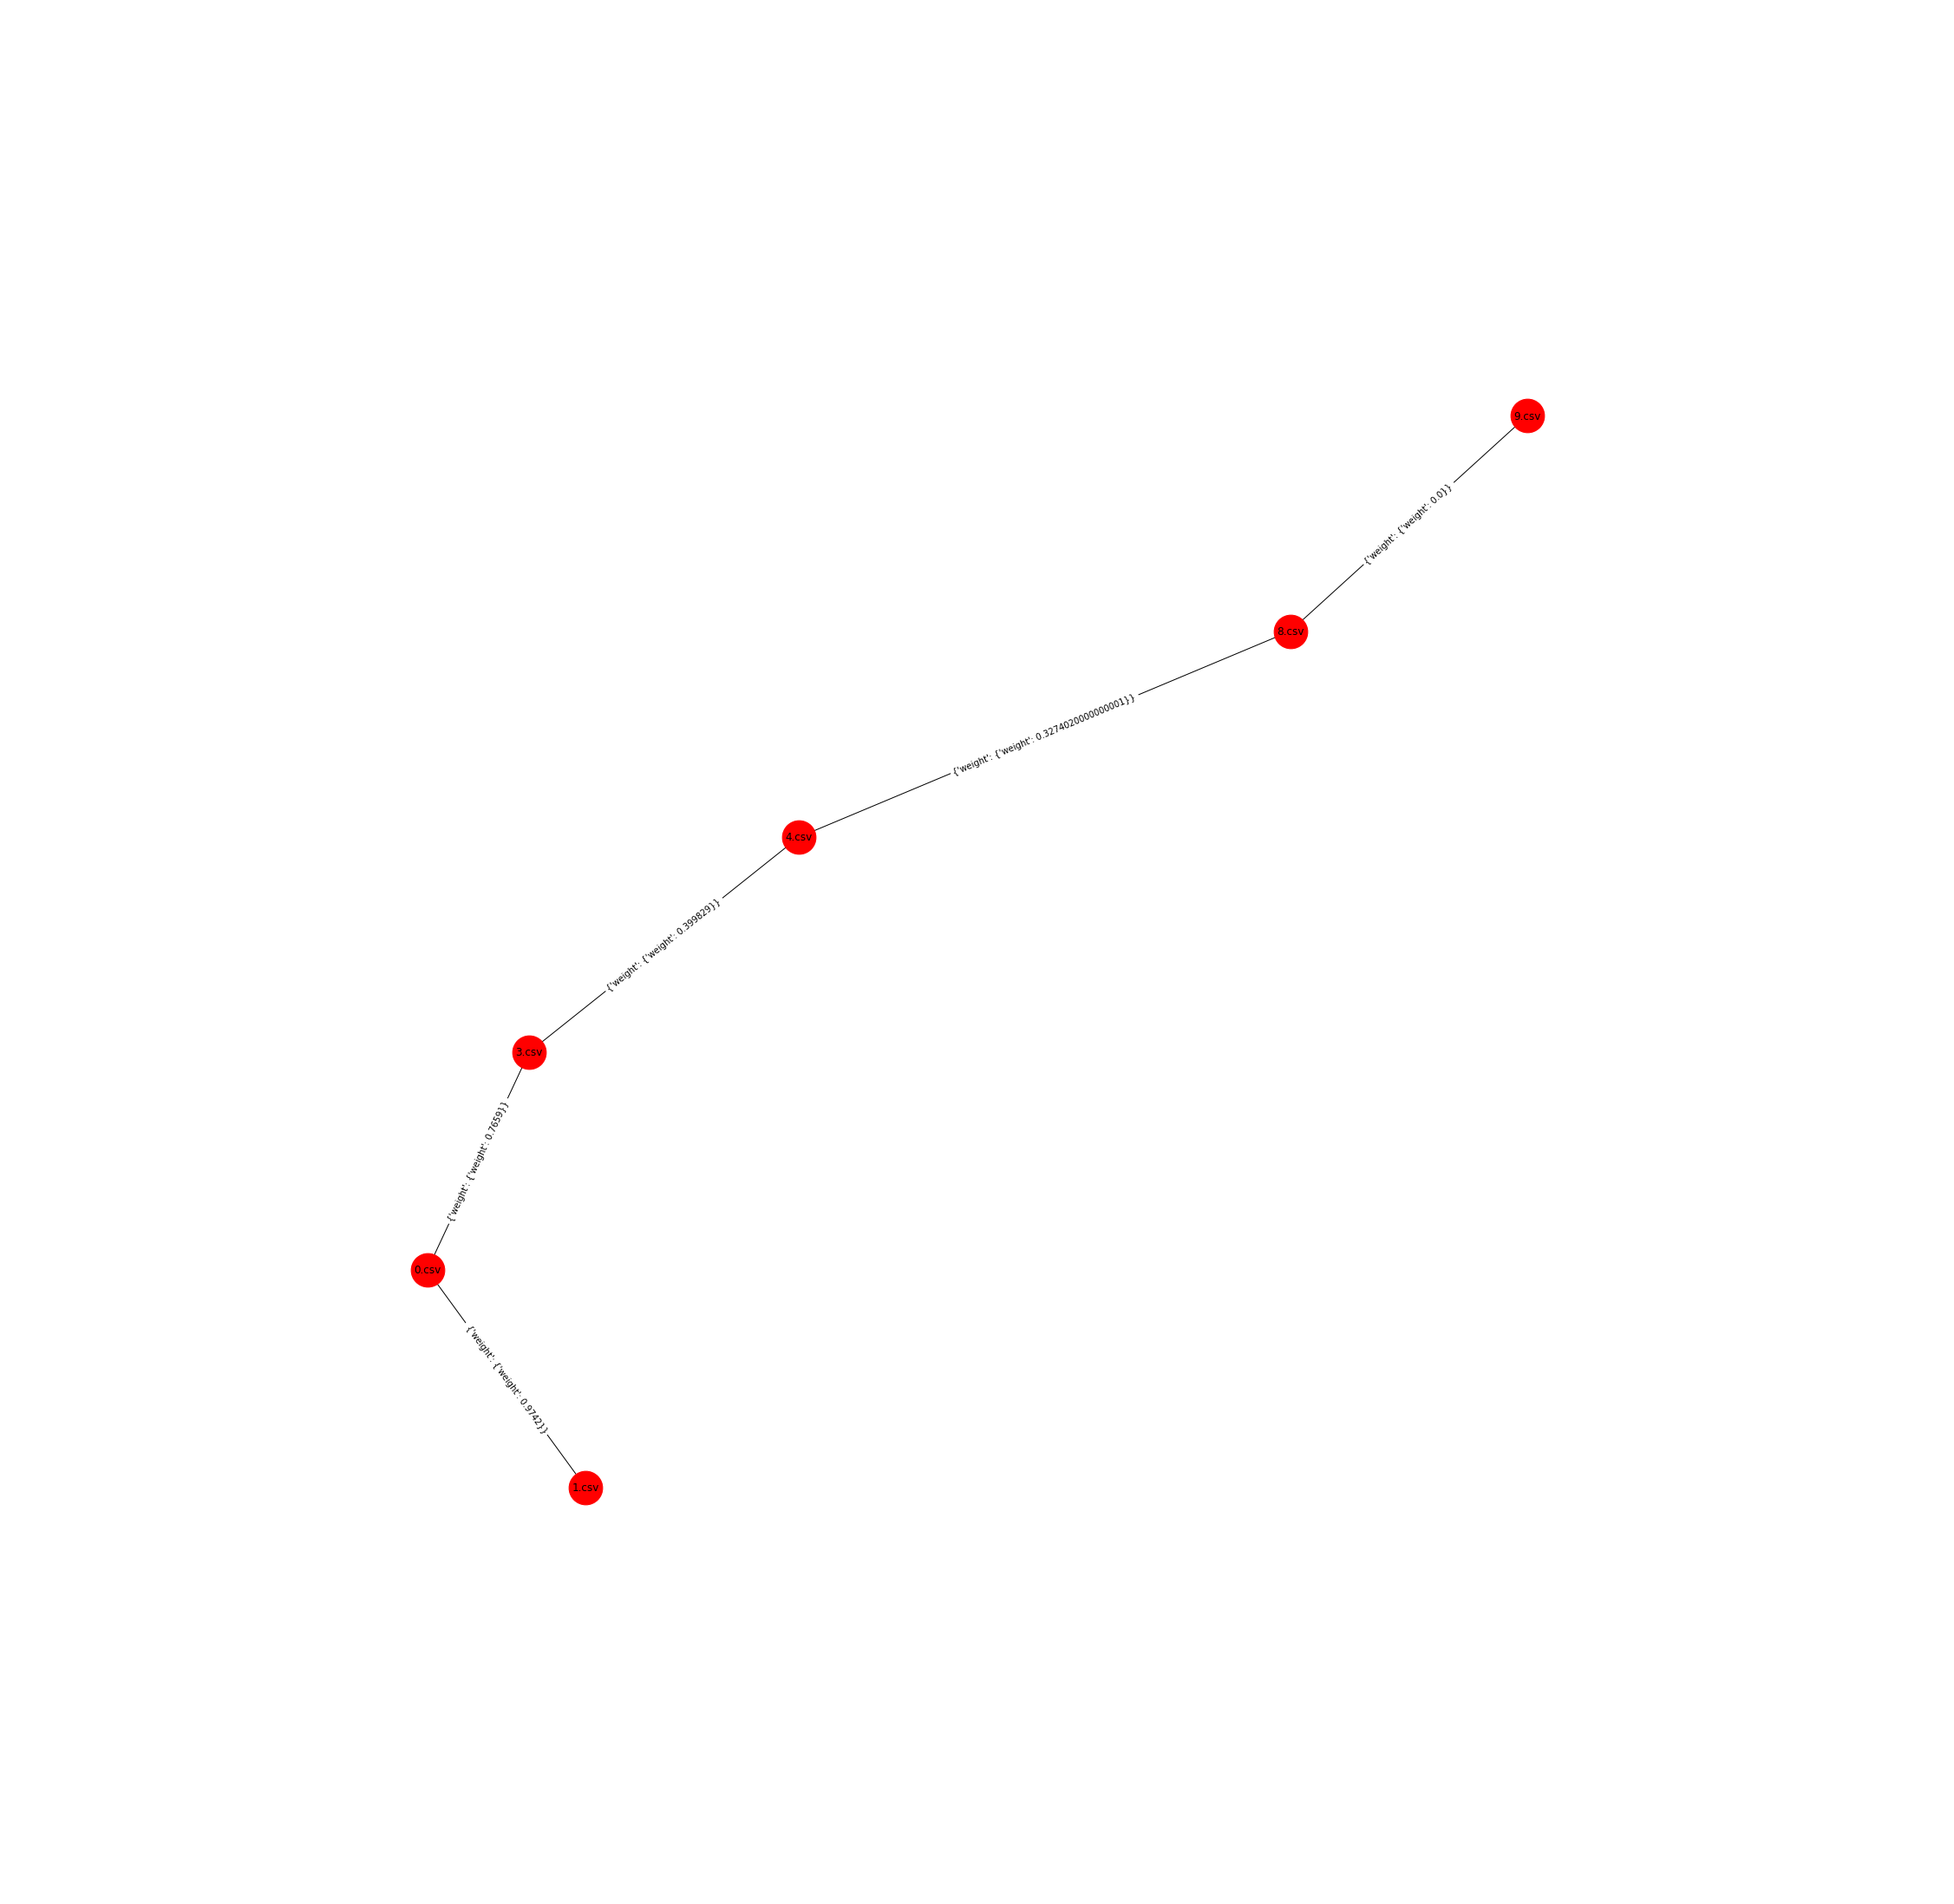

In [19]:
file_name_col = '/home/slhuang/Public/2019_spring/lineage_inference/code/src/preserving_ops/result/relation_sim_5.csv'
#'/home/slhuang/Public/2018-fall/lineage_inference/case_study/result/cell_sim.txt'
selected_edges = find_mst(file_name_col)
print (*selected_edges, sep='\n')
MST = construct_edges(selected_edges)
draw_graph(MST, canvas_size=(40,40))

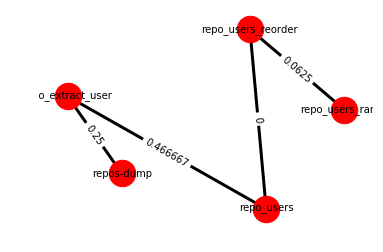

In [89]:
# edges = [
#          ('repo_extract_user','repo_users',0.466667), 
#          ('repo_users_reorder','repo_users_ranks',  0.0625), 
#          ('repo_users','repo_users_reorder',0),
#          ('repos-dump','repo_extract_user',0.25),
# #          ('user-geocodes-dump', 'users_ren_col', 0),
#         ]
G = construct_edges(edges)
plot_graph(G)



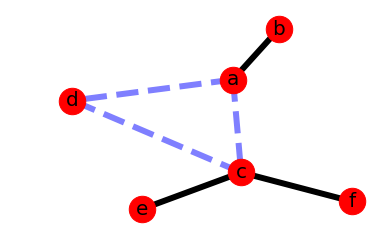

In [85]:
G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()